### Credit Risk
Credit risk adalah resiko yang harus ditanggung oleh seorang individu atau lembaga ketika memberikan pinjaman - biasanya dalam bentuk uang - ke individu atau pihak lain.

Resiko ini berupa tidak bisa dibayarkannya pokok dan bunga pinjaman, sehingga mengakibatkan kerugian berikut:

* gangguan aliran kas (cash flow) sehingga modal kerja terganggu.
* meningkatkan biaya operasional untuk mengejar pembayaran tersebut (collection).
Untuk memperkecil resiko kredit ini, biasanya dilakukan proses yang disebut dengan credit scoring dan credit rating terhadap pihak peminjam. Output proses ini akan menjadi basis untuk menentukan apakah aplikasi pengajuan pinjaman baru diterima atau ditolak.

### Credit Score
Credit score adalah nilai resiko yang diberikan kepada seorang individu atau organisasi yang mengajukan pinjaman berdasarkan rekam jejak pinjaman dan pembayaran yang dilakukan. Proses pemberian credit score ini biasanya disebut sebagai credit scoring.

Perhitungan credit score biasanya dibuat berdasarkan data historis lamanya keterlambatan pembayaran dan yang tidak bayar sama sekali (bad debt). Bad debt biasanya mengakibatkan lembaga pemberian kredit harus menyita aset atau melakukan write off .
Nilai credit score biasanya bervariasi antar lembaga. *Namun banyak yang kemudian mengadopsi model FICO Score yang memiliki rentang nilai 300 - 850.* Semakin tinggi nilai yang didapatkan, maka semakin baik tingkat kemampuan seseorang atau sebuah lembaga untuk membayar pinjaman.

### Risk Rating
Kadang banyak lembaga yang menggunakan risk rating atau tingkat resiko. Terbalik dengan credit score, semakin tinggi rating ini menunjukkan resiko yang semakin meningkat.

Selain itu kodifikasi juga dibuat lebih simpel  dibandingkan rentang nilai sehingga keputusan yang bisa diambil lebih cepat. Contoh, misalkan penggunaan kombinasi seperti huruf AAA,  AA+, P-1, dan seterusnya. Atau  untuk banyak internal lembaga peminjam, kategorisasi hanya menggunakan rentang angka yang kecil misalkan 1 sampai dengan 5.

Mari kita lihat contoh data risk rating dengan pendekatan terakhir ini pada subbab berikutnya.

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx')
print(data.head())

  kode_kontrak  pendapatan_setahun_juta kpr_aktif  durasi_pinjaman_bulan  \
0   AGR-000001                      295        YA                     48   
1   AGR-000011                      271        YA                     36   
2   AGR-000030                      159     TIDAK                     12   
3   AGR-000043                      210        YA                     12   
4   AGR-000049                      165     TIDAK                     36   

   jumlah_tanggungan rata_rata_overdue  risk_rating  
0                  5      61 - 90 days            4  
1                  5      61 - 90 days            4  
2                  0       0 - 30 days            1  
3                  3      46 - 60 days            3  
4                  0      31 - 45 days            2  


Kolom risk_rating ini berelasi langsung dengan kolom overdue_average, atau kolom keterlambatan pembayaran.

* Jika keterlambatan sampai dengan 30 hari (0 - 30 days) maka diberikan nilai 1.
* keterlambatan 31 sampai dengan 45 hari (31 - 45 days) maka scoring diberikan nilai 2.
* dan seterusnya

### Analisa dan Model Pengambilan Keputusan
Masih terkait dengan contoh data sebelumnya, namun dengan contoh data utuh - DQLab akan memberikan ilustrasi aktivitas tindak lanjut terhadap data dengan contoh skenario berikut.

Seorang analis akan melakukan penelusuran terhadap data kita untuk mencari pola. Berikut adalah temuannya: 

* Jika jumlah tanggungan berjumlah lebih dari 4, kecenderungan resikonya sangat tinggi (rating 4 dan 5).
* Jika durasi pinjaman semakin lama yaitu lebih dari 24 bulan, maka kecenderungan resiko juga meningkat (rating 4 dan 5).
Dari kedua temuan ini, analis akan membentuk aturan-aturan untuk menuntun pengambilan keputusan (decision making model) terhadap pengajuan pinjaman baru untuk sebagai berikut:

* Jika jumlah tanggungan berjumlah kurang dari 5 orang , dan durasi pinjaman kurang dari 24 bulan maka rating diberikan nilai 2 dan pengajuan pinjaman diterima. 
* Jika jumlah tanggungan berjumlah lebih dari 4 orang dan durasi pinjaman lebih dari 24 bulan maka maka rating diberikan nilai 5 dan pengajuan pinjaman ditolak.
* Jika jumlah tanggungan berjumlah kurang dari 5, dan durasi pinjaman kurang dari 36 bulan maka maka rating diberikan nilai 3 dan diberikan pinjaman. 
Nah, tiga aturan itu kita sebut sebagai model untuk memprediksi nilai risk rating dan menjadi basis pengambilan keputusan terhadap aplikasi pinjaman baru.

Dengan model ini, lembaga pinjaman akan semakin cepat mengambil keputusan dan dengan tingkat kesalahan pengambilan keputusan yang lebih minim.

### Kesimpulan
Credit risk adalah resiko yang harus ditanggung oleh seorang individu atau lembaga ketika memberikan pinjaman - biasanya dalam bentuk uang - ke individu atau pihak lain.

Resiko ini berupa tidak bisa dibayarkannya pokok dan bunga pinjaman, sehingga mengakibatkan kerugian berikut:

* gangguan aliran kas (cash flow) sehingga modal kerja terganggu.
* meningkatkan biaya operasional untuk mengejar pembayaran tersebut (collection).
Credit score dan risk rating adalah dua penilaian yang dilakukan meminimalkan resiko dari pihak pemberi kredit. Karena berdasarkan kedua model penilaian tersebut, akan diputuskan apakah aplikasi peminjaman seseorang disetujui atau ditolak.

Pada subbab berikutnya, kita akan melihat bagaimana model penilaian ini distrukturkan dalam bentuk decision tree.

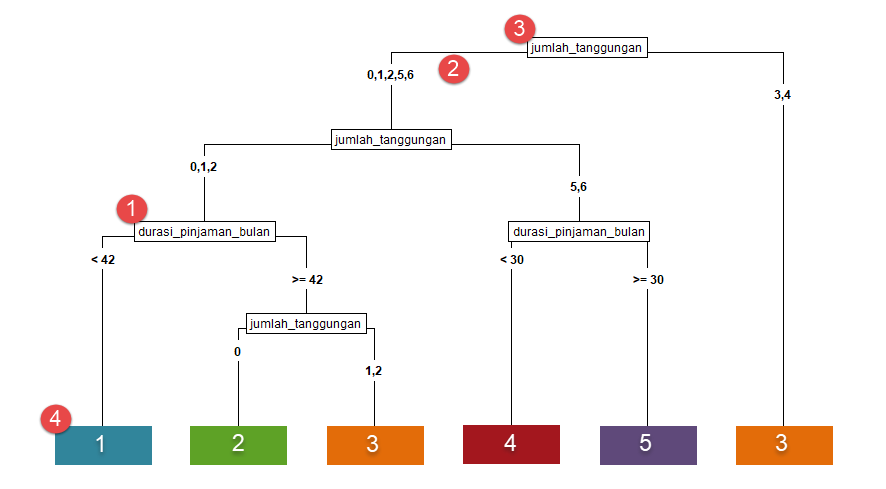

Problem yang dihadapi adalah lambatnya analisa resiko sehingga lembaga kredit bisa kehilangan kesempatan (lost opportunity) ketika calon peminjam tidak jadi bertransaksi.

Solusi machine learning denga algoritma decision tree sangat cocok diterapkan untuk membantu memprediksi credit risk dengan cepat. Konkritnya adalah penggunaan algoritma C5.0 di R.

Terkait hal tersebut, sepanjang bab ini Anda telah menempuh perjalanan sebagai seorang data scientist yang menerapkan solusi tersebut:

Mengerti apa itu decision tree dan algoritma C5.0.
Melakukan data preparation untuk class variable dan input variable.
Melakukan data preparation untuk training dan testing set.
Menggunakan training set untuk menghasilkan model credit risk menggunakan algoritma C5.0.
Mengevaluasi akurasi decision credit risk.
Menggunakan model tersebut untuk memprediksi risk rating data pengajuan baru.
Klik tombol Next untuk melihat apa saja yang perlu dilakukan setelah menyelesaikan course ini.

What Next?
Walaupun cukup banyak konsep dan implementasi dari course ini yang bisa langsung Anda terapkan untuk kasus credit rating di tempat Anda. Namun ada banyak catatan bagi Anda agar lebih baik menggunakan model ini, yaitu:

Pada kenyataannya, variable yang terlibat jauh lebih banyak dan kadang masih dalam bentuk yang kosong, tidak lengkap atau tidak standar. Ini memerlukan teknik data cleansing yang juga telah tersedia di DQLab.
Variable yang sangat banyak ini perlu diambil yang korelasinya tinggi saja. Tidak keseluruhan karena akan mengakibatkan pembentukan model tidak optimal. Teknik ini disebut data reduction atau feature selection, atau kalau lebih luas ilmunya mencakup apa yang dinamakan feature engineering. Ini akan dibahas pada course lain.
Evaluasi model yang juga umum dan menjadi best practice adalah menggunakan visualisasi ROC Curve. Ini kami putuskan untuk dijadikan short course lanjutan setelah decision tree ini.
Terakhir, Anda perlu lebih banyak latihan dan praktek menangani berbagai kasus mengenai pembentukan model decision tree terutama untuk credit risk ini.  Ini akan secara regular kami berikan dalam bentuk project atau data challenge dari partner kami.
Stay tuned dengan announcement dari kami untuk hal-hal di atas. Untuk saat ini, klik tombol Next untuk mendapatkan sertifikat Anda!